In [87]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline
import seaborn as sns
import pandas as pd
import math as mt
import scipy
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import researchpy as rp
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
import dendropy
from dendropy import treecalc

from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [64]:
df = pd.read_excel('2022.7.25 virD allele.xlsx',sheet_name='data')
df['GFP_log'] = df.GFP.apply(np.log2)
#df['ID'] = df.Strain + "_" + df.Induction
df.head()

,Well,GFP,Strain,Plant,Leaf,GFP_log
0,A1,185108,WT,1,Top,17.498008
1,A2,254153,WT,1,Top,17.955338
2,A3,196532,WT,1,Top,17.584405
3,A4,241462,WT,1,Top,17.881437
4,A5,221387,WT,1,Bottom,17.756211


In [65]:
dfsum=rp.summary_cont(df['GFP'].groupby(df['Strain']))
dfsum

,N,Mean,SD,SE,95% Conf.,Interval
Strain,,,,,,
A4,64,237280.9062,114711.8730,14338.9841,208626.7330,265935.0795
Ach5,64,83258.1719,35920.7250,4490.0906,74285.4417,92230.9020
B21,64,813.8750,106.0294,13.2537,787.3896,840.3604
C58,64,298870.7031,107009.5529,13376.1941,272140.5121,325600.8941
Leaf,16,554.1875,57.0616,14.2654,523.7815,584.5935
NCIB,64,109171.9688,36871.1026,4608.8878,99961.8413,118382.0962
Q15,64,5551.0156,1995.9585,249.4948,5052.4400,6049.5912
S4,64,87973.4844,46358.6339,5794.8292,76393.4422,99553.5266
T60,65,210729.1077,120268.8414,14917.5138,180927.9480,240530.2674


(8.0, 20.0)

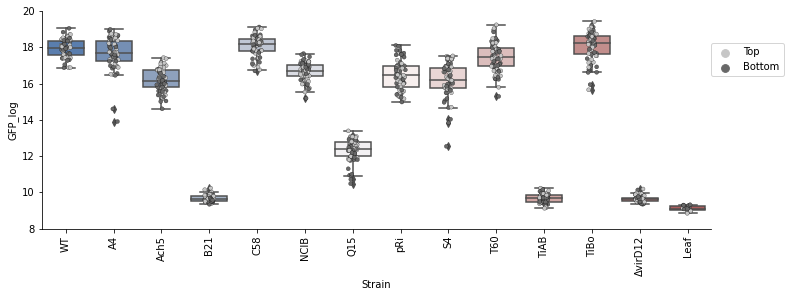

In [66]:
plt.figure(figsize=(12,4))
sns.boxplot(x="Strain", y="GFP_log", data=df,
            width=.75, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP_log",hue='Leaf', data=df,
              size=4, edgecolor='black',linewidth=0.25, palette="Greys",)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
plt.ylim(8,20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'WT'),
  Text(1, 0, 'A4'),
  Text(2, 0, 'Ach5'),
  Text(3, 0, 'B21'),
  Text(4, 0, 'C58'),
  Text(5, 0, 'NCIB'),
  Text(6, 0, 'Q15'),
  Text(7, 0, 'pRi'),
  Text(8, 0, 'S4'),
  Text(9, 0, 'T60'),
  Text(10, 0, 'TiAB'),
  Text(11, 0, 'TiBo'),
  Text(12, 0, 'ΔvirD12'),
  Text(13, 0, 'Leaf')])

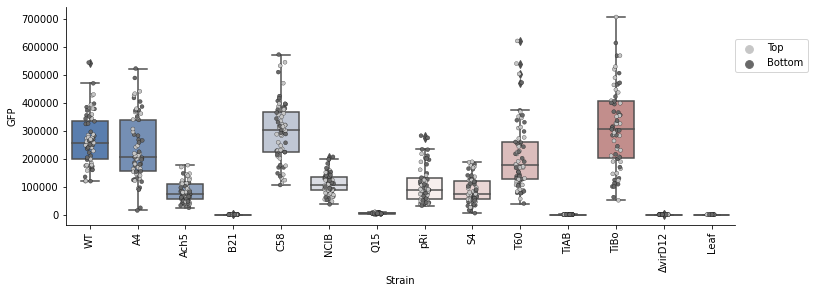

In [67]:
plt.figure(figsize=(12,4))
sns.boxplot(x="Strain", y="GFP", data=df,
            width=.75, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="Strain", y="GFP",hue='Leaf', data=df,
              size=4, edgecolor='black',linewidth=0.25, palette="Greys",)

sns.despine(top=True, right=True)
plt.legend(loc=(1,.7))
plt.xticks(rotation=90)
#plt.ylim(8,20)

In [5]:
#tree = Phylo.read("virD2.nwk", "newick")
#print(tree)

In [68]:
dists=[]
tree = dendropy.Tree.get_from_path("virD2.nwk", "newick")
for x in tree.taxon_set:
    for y in tree.taxon_set:
        dists.append([x.label,y.label,
                     treecalc.patristic_distance(tree,x,y)])
        

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: CriticalDeprecationWarning: Deprecated since DendroPy 4: 'taxon_set' will no longer be supported in future releases; use 'taxon_namespace' instead
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: CriticalDeprecationWarning: 
  # Deprecated since DendroPy 4: The 'dendropy.treecalc.patristic_distance()' function has moved to 'dendropy.calculate.treemeasure.patristic_distance()'.
  # Instead of:
  #     from dendropy import treecalc
  #     pdm = treecalc.patristic_distance(...)
  # Use:
  #     from dendropy.calculate import treemeasure
  #     pdm = treemeasure.patristic_distance(...)
  


In [69]:
virD2dist_df=pd.DataFrame(dists,columns=['Tax1','Tax2','Dist'])

In [70]:
c58dist_df = virD2dist_df[virD2dist_df.Tax1=='virD2 C58']
c58dist_df['Strain'] = c58dist_df.Tax2.str.lstrip('virD2 ')
c58dist_df.replace(to_replace='\x10S4',value='S4',inplace=True)
c58dist_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Tax1,Tax2,Dist,Strain
88,virD2 C58,virD2 TiAB,2401.000000,TiAB
89,virD2 C58,virD2 T60,1723.600000,T60
90,virD2 C58,virD2 S4,1723.600000,S4
91,virD2 C58,virD2 pRi,1723.600000,pRi
92,virD2 C58,virD2 NCIB,1723.600000,NCIB
93,virD2 C58,virD2 TiBo,1534.666667,TiBo
94,virD2 C58,virD2 Ach5,1534.666667,Ach5
95,virD2 C58,virD2 Q15,1191.000000,Q15
96,virD2 C58,virD2 C58,0.000000,C58
97,virD2 C58,virD2 A4,891.000000,A4


In [71]:
c58dist_df.Strain.tolist()

['TiAB', 'T60', 'S4', 'pRi', 'NCIB', 'TiBo', 'Ach5', 'Q15', 'C58', 'A4', 'B21']

In [72]:
df_dist_compare = pd.merge(dfsum,c58dist_df,on='Strain')
df_dist_compare['log2gfp'] = np.log2(df_dist_compare.Mean)
df_dist_compare

,Strain,N,Mean,SD,SE,95% Conf.,Interval,Tax1,Tax2,Dist,log2gfp
0,A4,64,237280.9062,114711.8730,14338.9841,208626.7330,265935.0795,virD2 C58,virD2 A4,891.000000,17.856236
1,Ach5,64,83258.1719,35920.7250,4490.0906,74285.4417,92230.9020,virD2 C58,virD2 Ach5,1534.666667,16.345304
2,B21,64,813.8750,106.0294,13.2537,787.3896,840.3604,virD2 C58,virD2 B21,2690.100000,9.668663
3,C58,64,298870.7031,107009.5529,13376.1941,272140.5121,325600.8941,virD2 C58,virD2 C58,0.000000,18.189162
4,NCIB,64,109171.9688,36871.1026,4608.8878,99961.8413,118382.0962,virD2 C58,virD2 NCIB,1723.600000,16.736243
5,Q15,64,5551.0156,1995.9585,249.4948,5052.4400,6049.5912,virD2 C58,virD2 Q15,1191.000000,12.438536
6,S4,64,87973.4844,46358.6339,5794.8292,76393.4422,99553.5266,virD2 C58,virD2 S4,1723.600000,16.424781
7,T60,65,210729.1077,120268.8414,14917.5138,180927.9480,240530.2674,virD2 C58,virD2 T60,1723.600000,17.685030
8,TiAB,64,814.2031,142.0637,17.7580,778.7167,849.6896,virD2 C58,virD2 TiAB,2401.000000,9.669245
9,TiBo,63,312338.0794,146851.7001,18501.5751,275353.9577,349322.2011,virD2 C58,virD2 TiBo,1534.666667,18.252749


Text(0.5, 1.0, '$virD12$ Alleles')

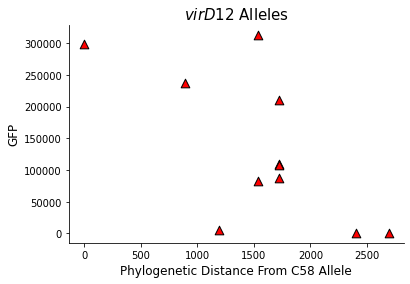

In [82]:
plt.scatter(df_dist_compare.Dist,df_dist_compare.Mean,linewidths=1,edgecolors='black',marker='^',
           s=75,c='red')
sns.despine(top=True)
plt.xlabel('Phylogenetic Distance From C58 Allele',size=12)
plt.ylabel('GFP',size=12)
plt.title('$virD12$ Alleles',size=15)

In [74]:
scipy.stats.pearsonr(df_dist_compare.Dist,df_dist_compare.Mean)


(-0.6635585381852208, 0.02600789247435587)

In [75]:
scipy.stats.spearmanr(df_dist_compare.Dist,df_dist_compare.Mean)


SpearmanrResult(correlation=-0.6109234732870691, pvalue=0.04585880076007957)

In [5]:
comp = mc.MultiComparison(df['GFP'], df['Strain'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")
print(tbl)


Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.001
group1  group2   stat    pval  pval_corr reject
-----------------------------------------------
    A4    Ach5  10.2507    0.0       0.0   True
    A4     B21  16.4912    0.0       0.0   True
    A4     C58  -3.1408 0.0021    0.1911  False
    A4    Leaf   8.2153    0.0       0.0   True
    A4    NCIB   8.5057    0.0       0.0   True
    A4     Q15  16.1584    0.0       0.0   True
    A4      S4   9.6541    0.0       0.0   True
    A4     T60   1.2827 0.2019       1.0  False
    A4    TiAB  16.4912    0.0       0.0   True
    A4    TiBo  -3.2127 0.0017    0.1522  False
    A4      WT  -1.7132 0.0891       1.0  False
    A4     pRi   7.9215    0.0       0.0   True
    A4 ΔvirD12   16.492    0.0       0.0   True
  Ach5     B21  18.3613    0.0       0.0   True
  Ach5     C58 -15.2812    0.0       0.0   True
  Ach5    Leaf   9.1656    0.0       0.0   True
  Ach5    NCIB  -4.0273 0.0001    0.0088   

In [85]:
aln = AlignIO.read(open('virD2_alleles_aligned.fasta'),'fasta')
print(aln)



Alignment with 11 rows and 538 columns
--------------------------------------------...NRR virD2_A4
--------------------------------------------...T-- virD2_Ach5
--------------------------------------------...--- virD2_B21
--------------------------------------------...NRR virD2_C58
--------------------------------------------...NRR virD2_NCIB
MLKIRQRIWALCKLNETLSVNRSLTSTVCSVPFCPYHGDGSTVA...NRR virD2_pRi
--------------------------------------------...--- virD2_TiAB
--------------------------------------------...T-- virD2_TiBo
--------------------------------------------...DRR virD2_Q15
--------------------------------------------...NRR virD2_S4
--------------------------------------------...--- virD2_T60


In [89]:
constructor = DistanceTreeConstructor()
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)
upgmatree = constructor.upgma(dm)
print(upgmatree)


Tree(rooted=True)
    Clade(branch_length=0, name='Inner10')
        Clade(branch_length=0.266176812267658, name='virD2_B21')
        Clade(branch_length=0.04301231412639406, name='Inner9')
            Clade(branch_length=0.22316449814126393, name='virD2_TiAB')
            Clade(branch_length=0.041008364312267676, name='Inner8')
                Clade(branch_length=0.02390218401486993, name='Inner7')
                    Clade(branch_length=0.18215613382899626, name='virD2_T60')
                    Clade(branch_length=0.034851301115241595, name='Inner5')
                        Clade(branch_length=0.14730483271375466, name='virD2_S4')
                        Clade(branch_length=0.051579925650557634, name='Inner3')
                            Clade(branch_length=0.09572490706319703, name='virD2_pRi')
                            Clade(branch_length=0.09572490706319703, name='virD2_NCIB')
                Clade(branch_length=0.08942263011152418, name='Inner6')
                    Clade(bran

In [90]:
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(aln)
print(dm)


virD2_A4	0
virD2_Ach5	0.4181395348837209	0
virD2_B21	0.5619335347432024	0.5990190067443286	0
virD2_C58	0.1960958296362023	0.3890410958904109	0.5324675324675325	0
virD2_NCIB	0.44771528998242527	0.516187870497036	0.6646989374262102	0.4486021505376344	0
virD2_pRi	0.4515138218516893	0.5050045495905369	0.6694214876033058	0.4431574431574432	0.08858603066439519	0
virD2_TiAB	0.16800000000000004	0.24230465666929757	0.5182049110922946	0.16666666666666663	0.17660910518053374	0.18095987411487013	0
virD2_TiBo	0.4078030654900139	0.070716228467815	0.592274678111588	0.380736029077692	0.5125398996808026	0.5059144676979073	0.2382843526608419	0
virD2_Q15	0.2255566311713456	0.3909090909090909	0.519140362659503	0.20962363030014297	0.4405560882070949	0.4362159579550884	0.2264150943396226	0.37323232323232325	0
virD2_S4	0.4423076923076923	0.4848334162108404	0.6155932203389831	0.41392465426800196	0.21065145030908228	0.20454545454545459	0.22230889235569418	0.4903033316757832	0.45782545099951244	0
virD2_T60	0.4

In [109]:
distdf=pd.DataFrame.from_dict(dict(zip(dm.names,dm[3])),orient='index',columns=['Dist'])
distdf['Strain'] = distdf.index.str.lstrip('virD2_')
distdf


,Dist,Strain
virD2_A4,0.196096,A4
virD2_Ach5,0.389041,Ach5
virD2_B21,0.532468,B21
virD2_C58,0.000000,C58
virD2_NCIB,0.448602,NCIB
virD2_pRi,0.443157,pRi
virD2_TiAB,0.166667,TiAB
virD2_TiBo,0.380736,TiBo
virD2_Q15,0.209624,Q15
virD2_S4,0.413925,S4


In [110]:
distdf = pd.merge(distdf,dfsum,on='Strain')
distdf

,Dist,Strain,N,Mean,SD,SE,95% Conf.,Interval
0,0.196096,A4,64,237280.9062,114711.8730,14338.9841,208626.7330,265935.0795
1,0.389041,Ach5,64,83258.1719,35920.7250,4490.0906,74285.4417,92230.9020
2,0.532468,B21,64,813.8750,106.0294,13.2537,787.3896,840.3604
3,0.000000,C58,64,298870.7031,107009.5529,13376.1941,272140.5121,325600.8941
4,0.448602,NCIB,64,109171.9688,36871.1026,4608.8878,99961.8413,118382.0962
5,0.443157,pRi,64,107735.9219,62907.9320,7863.4915,92021.9880,123449.8557
6,0.166667,TiAB,64,814.2031,142.0637,17.7580,778.7167,849.6896
7,0.380736,TiBo,63,312338.0794,146851.7001,18501.5751,275353.9577,349322.2011
8,0.209624,Q15,64,5551.0156,1995.9585,249.4948,5052.4400,6049.5912
9,0.455996,T60,65,210729.1077,120268.8414,14917.5138,180927.9480,240530.2674


Text(0.5, 1.0, '$virD12$ Alleles')

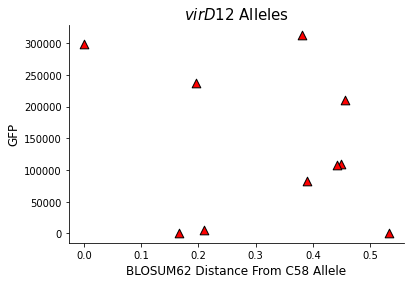

In [115]:
plt.scatter(distdf.Dist,distdf.Mean,linewidths=1,edgecolors='black',marker='^',
           s=75,c='red')
sns.despine(top=True)
plt.xlabel('BLOSUM62 Distance From C58 Allele',size=12)
plt.ylabel('GFP',size=12)
plt.title('$virD12$ Alleles',size=15)

In [113]:
scipy.stats.spearmanr(distdf.Dist,distdf.Mean)

SpearmanrResult(correlation=-0.28484848484848485, pvalue=0.42503815489214547)